# TELCO CUSTOMER CHURN



Here we will do **Exploratory Data Analysis** or **EDA** for  [Telco-Customer-Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) dataset, and choosing the best models for the dataset. We use four models : 

*   Random Forest
*   Decision Tree
*   K Nearest Neighbors [KNN]
*   Logistic Regression



In [1]:
# Import the Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn import tree
from sklearn import datasets
from sklearn.tree import plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier 

In [2]:
# read the data

df= pd.read_csv('/content/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Dataframe Explanation:**


|         Item         |                Description                |
|----------------------|-------------------------------------------|
| customerID           | Customer identification code <br>
| gender               | Gender of the customer [male/female]      
| SeniorCitizen        | Whether the customer is a senior citizen or not [0/1]
| Partner              | Whether the customer has partner or not [Yes/No]
| Dependents           | Whether the customer has dependents or not [Yes/No]
| tenure               | Number of months the customer has been with the company
| PhoneService         | Whether the customer has phone service or not [Yes/No]
| MultipleLines        | Whether the customer has multiple lines service or not [Yes/No/No phone service]
| InternetService      | Type of internet service used by customer [DSL/ Fiber optic/No]
| OnlineSecurity       | Whether the customer has online security service or not [Yes/No/No InternetService]
| OnlineBackup         | Whether the customer has online backup service or not [Yes/No/No InternetService]
| DeviceProtection     | Whether the customer has device protection or not [Yes/No/No InternetService]
| TechSupport          | Whether the customer has technical support or not [Yes/No/No InternetService]
| StreamingTV          | Whether the customer has TV Streaming service or not [Yes/No/No InternetService]
| StreamingMovies      | Whether the customer has Movies service or not [Yes/No/No InternetService]
| Contract             | Contract duration between customer and the company  [Month-to-month/One year/Two year]
| PaperlessBilling     | Whether the customer using paperless billing or not [Yes/No]
| PaymentMethod        | Method of payment used by customer [Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)]
| MonthlyCharges       | Monthly amount of charges to the customer
| TotalCharges         | Total amount of charges to the customer
| **Churn**            | Wheter the customer **churn** or not [Yes/No]

<br>

There are no null values in each columns, but we need  convert `TotalCharges` from **string** to **float**.

# EXPLORATORY DATA ANALYSIS

## Data Preparation [EDA]

In [5]:
# Convert data type from column TotalCharges

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Okay, now after we convert it to **float** we have missing values on `TotalCharges`.

## Data Cleaning

In [7]:
# Count null values

df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Well, as we know, `TotalCharges` has 11 null values. Because it is less than **1%** from total row, we can drop it.

In [8]:
# Drop null values

df = df.dropna()

In [9]:
# Let's check it once more!

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# Check if there is any duplicated values

df.duplicated().sum()

0

NICE! Now the dataset is clean, and ready to go!

## Correlation and Descriptive Statistics

In [11]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


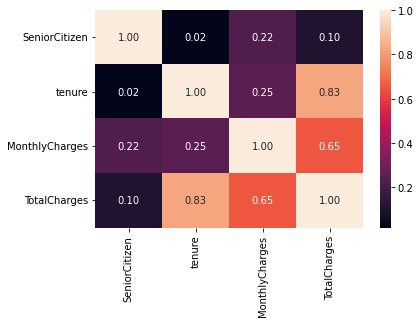

In [12]:
# correlation heatmap

correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

# (fig.1)

`MonthlyCharges` has high correlation with `TotalCharges` and `tenure`. But, because `tenure` has higher correlation value than `TotalCharges`, we can drop the `TotalCharges` column. So it won't create **multicolinearity**.

In [13]:
df = df.drop('TotalCharges', axis = 1)

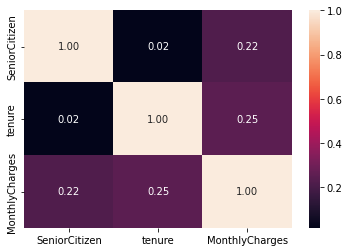

In [14]:
# check again the correlation heatmap

correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

# (fig.2)

In [15]:
# Let's do Descriptive Statistics with the dataframe

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208
std,0.368844,24.545260,30.085974
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.587500
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.862500
max,1.000000,72.000000,118.750000


**Conclusion:**

1. `SeniorCitizen` is boolean with [0] for not a senior, and [1] for senior.
2. Maximum and minimum value for `tenure` and `MonthlyCharges`, is still acceptable, with the in between range is still acommodate between 25% to 75% of the data.
3. The mean value for `tenure` and `MonthlyCharges` is almost 50% from the median.

## Exploratory Data Analysis [EDA]

Usually the things that make Customer to **churn** are, services, and price. Now, for this EDA, we will analyst what is the thing that probably affect customer to **churn**, from each individual categorie or **Univariate Analysis** and multiple categories or **Bivariate Analysis**.



In [16]:
# creating numerical dataframe : df_numericals

df_numericals = df.loc[:,['SeniorCitizen','tenure','MonthlyCharges']]
df_numericals.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [17]:
# creating categorical dataframe : df_categoricals, by dropping SeniorCitizen, tenure, and MonthlyCharges columns

df_categoricals = df.drop(labels = ['SeniorCitizen','tenure','MonthlyCharges'], axis = 1)
df_categoricals.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


### Univariate Analysis

Here we analyze each columns or features on the dataset.

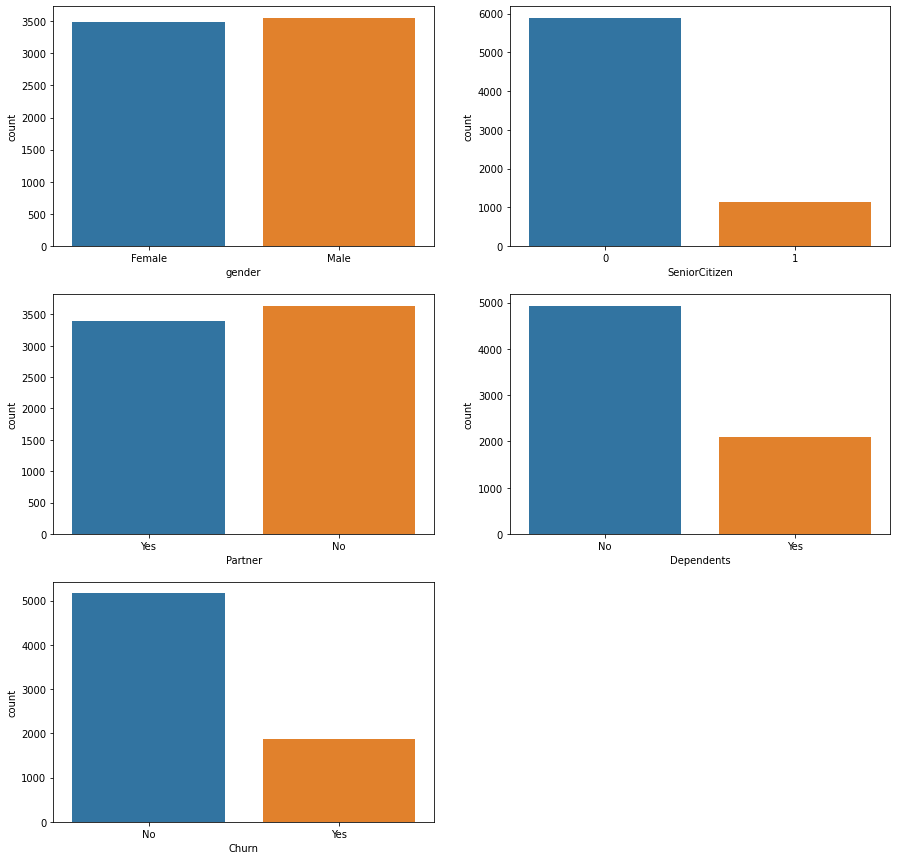

In [18]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'gender', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'SeniorCitizen', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'Partner', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'Dependents', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'Churn', data = df)

# (fig. 3-7)

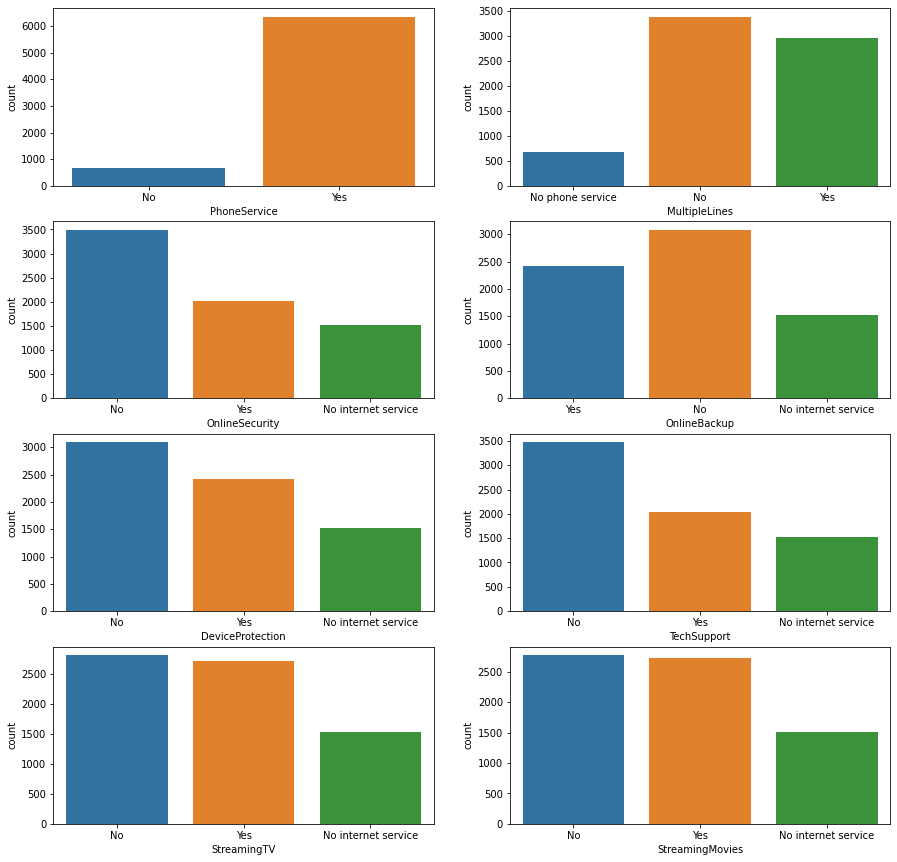

In [19]:
plt.figure(figsize = (15,15))

plt.subplot(4,2,1)
sns.countplot(x = 'PhoneService', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'MultipleLines', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'OnlineSecurity', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'OnlineBackup', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'DeviceProtection', data = df)

plt.subplot(4,2,6)
sns.countplot(x = 'TechSupport', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'StreamingTV', data = df)

plt.subplot(4,2,8)
sns.countplot(x = 'StreamingMovies', data = df)

# (fig. 8-15)

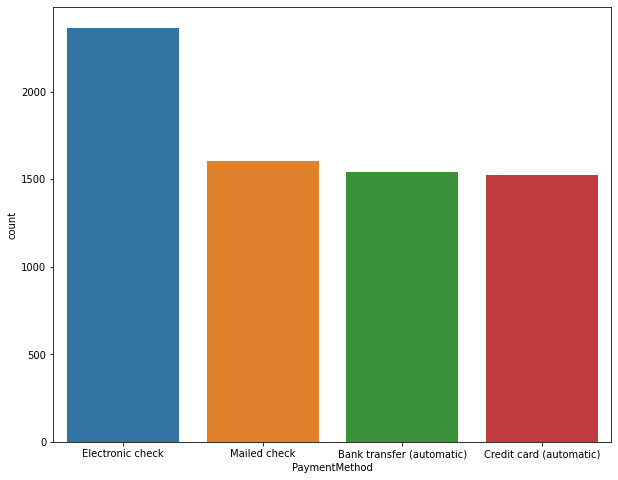

In [20]:
# Visualizing PaymentMethod

plt.figure(figsize = (10,8))
sns.countplot(x = 'PaymentMethod', data = df)

# (fig.16)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


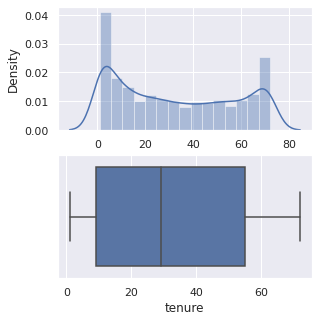

In [21]:
# Visualizing tenure

plt.figure(figsize = (10, 5))
sns.set(color_codes = True)

plt.subplot(2,2,1)
sns.distplot(df['tenure'], kde = True)

plt.subplot(2,2,3)
sns.boxplot(x=df["tenure"])

# (fig. 17-18)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


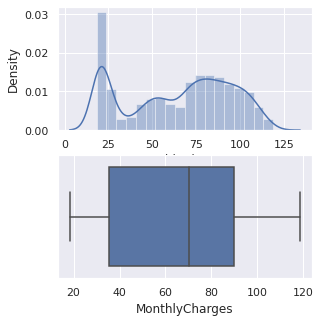

In [22]:
# Visualizing MonthlyCharges

plt.figure(figsize = (10, 5))
sns.set(color_codes = True)

plt.subplot(2,2,1)
sns.distplot(df['MonthlyCharges'], kde = True)

plt.subplot(2,2,3)
sns.boxplot(x=df["MonthlyCharges"])

# (fig. 19-20)

**Conclusion:**
<br>

1.   Based on figure 3-7, majority of the customer is not a **senior citizen**, with **no dependents**. The ratio between **male and female**, also with **partnership**, is almost equal. The listed customers also tends to not **churn**.
2.   From overall services, on figure 8-15, we can see that the most favorite service is **Phone Service**, followed by **Online Backup**. The least favorite service is **Device Protection**.
3.   Customer prefer **Electronic check** as their **Payment Method**, based on figure 16.
4.   As we can see from figure 17-18 majority of the customers is new on using the service.
5.   Most of the customers also charged smaller fee on their **Monthly Charges**
6.   There is no **outliers** for `tenure` and `MonthlyCharges`



### Bivariate Analysis

Here we try to analyze the relationship between `Churn` and other features. We need to see the patterns, and what is the type of service with smallest sum of **churn** customers.

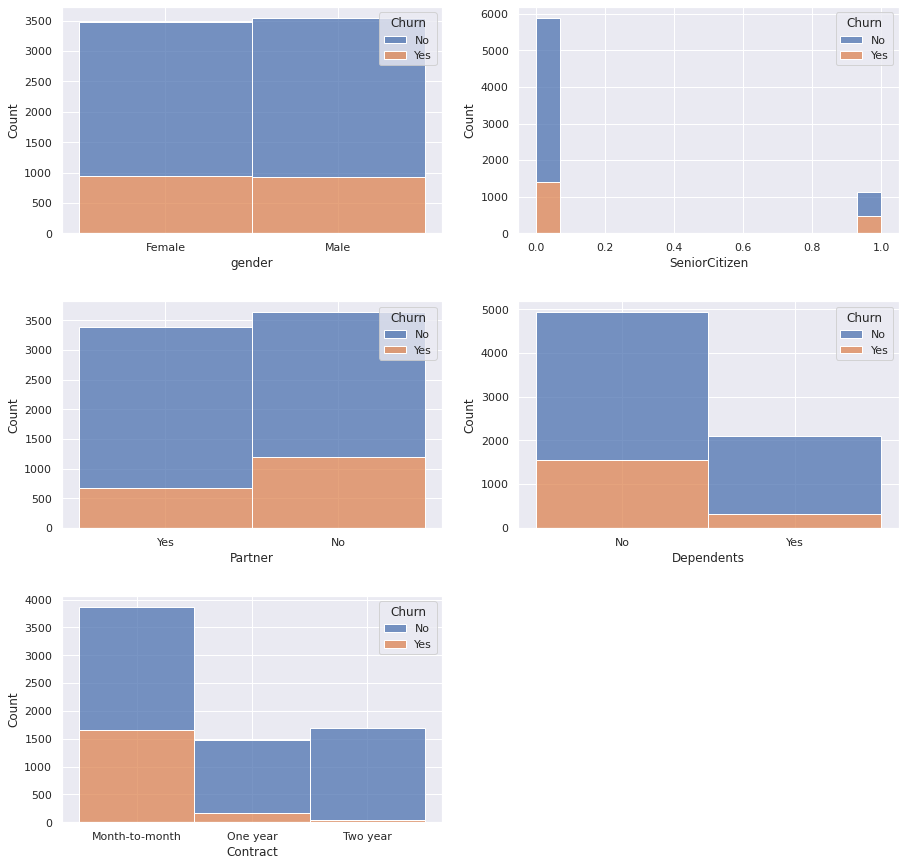

In [23]:
# Visualize each other features

plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.histplot(data = df,x= "gender",hue = 'Churn',multiple='stack')

plt.subplot(3,2,2)
sns.histplot(data = df,x= "SeniorCitizen",hue = 'Churn',multiple='stack')

plt.subplot(3,2,3)
sns.histplot(data = df,x= "Partner",hue = 'Churn',multiple='stack')

plt.subplot(3,2,4)
sns.histplot(data = df,x= "Dependents",hue = 'Churn',multiple='stack')

plt.subplot(3,2,5)
sns.histplot(data = df,x= "Contract",hue = 'Churn',multiple='stack')

plt.subplots_adjust(hspace = 0.3)

# (fig. 21-25)

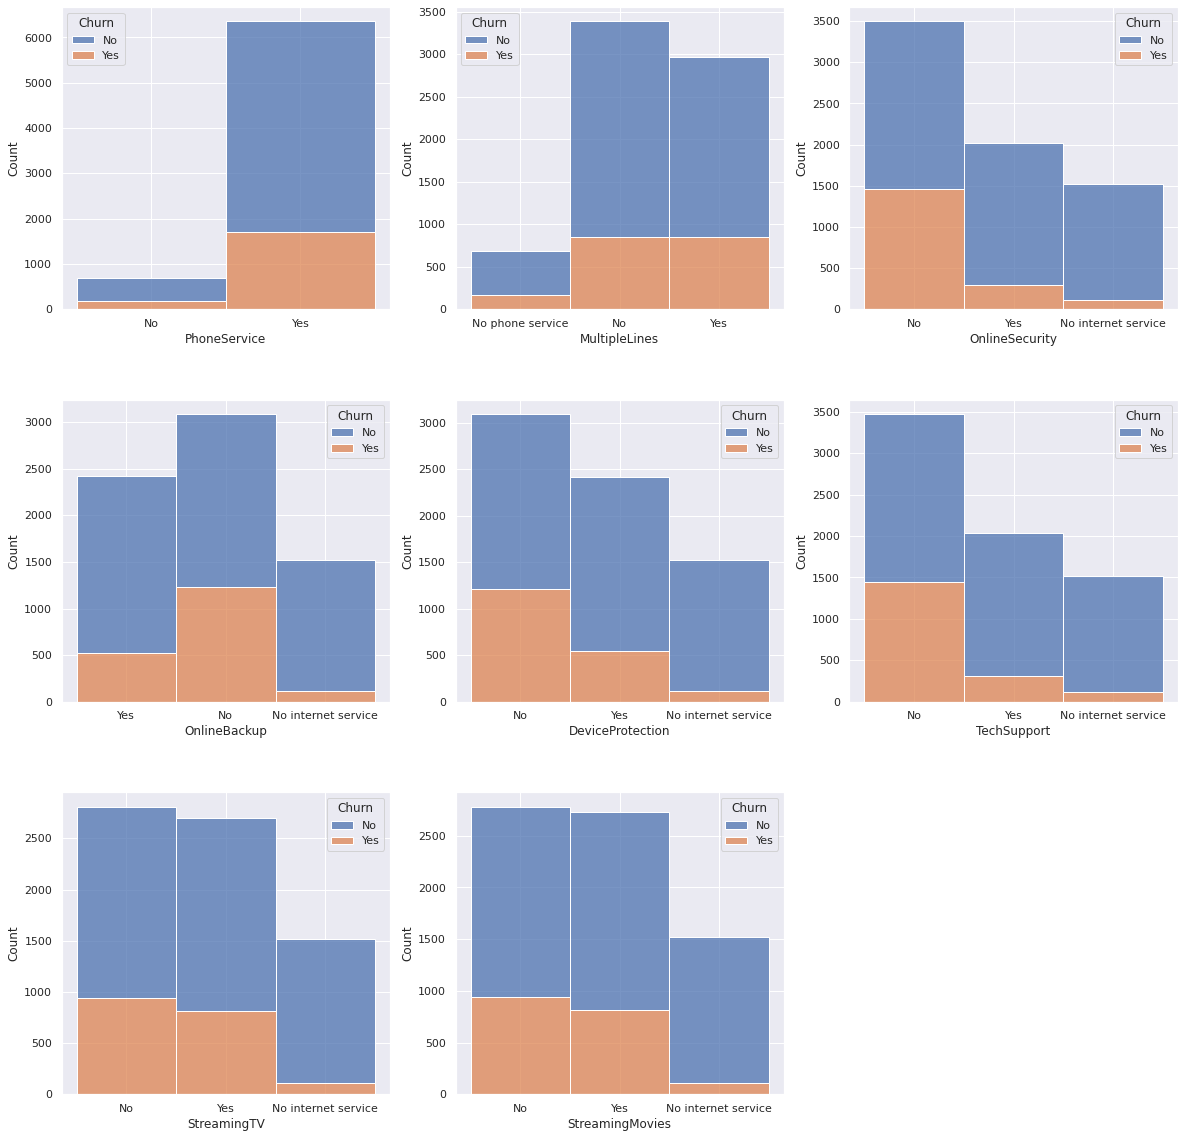

In [24]:
# Visualize each services

plt.figure(figsize = (20,20))

plt.subplot(3,3,1)
sns.histplot(data = df,x= "PhoneService",hue = 'Churn',multiple='stack')

plt.subplot(3,3,2)
sns.histplot(data = df,x= "MultipleLines",hue = 'Churn',multiple='stack')

plt.subplot(3,3,3)
sns.histplot(data = df,x= "OnlineSecurity",hue = 'Churn',multiple='stack')

plt.subplot(3,3,4)
sns.histplot(data = df,x= "OnlineBackup",hue = 'Churn',multiple='stack')

plt.subplot(3,3,5)
sns.histplot(data = df,x= "DeviceProtection",hue = 'Churn',multiple='stack')

plt.subplot(3,3,6)
sns.histplot(data = df,x= "TechSupport",hue = 'Churn',multiple='stack')

plt.subplot(3,3,7)
sns.histplot(data = df,x= "StreamingTV",hue = 'Churn',multiple='stack')

plt.subplot(3,3,8)
sns.histplot(data = df,x= "StreamingMovies",hue = 'Churn',multiple='stack')

plt.subplots_adjust(hspace = 0.3)

# (fig. 26-33)

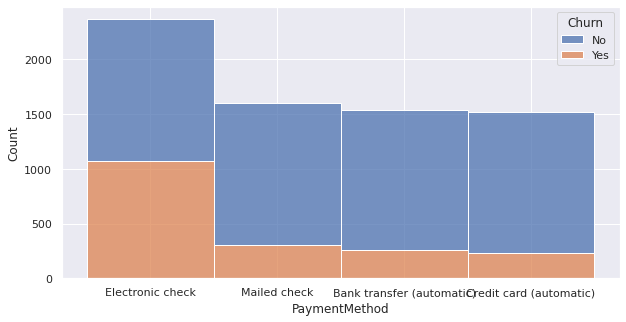

In [25]:
plt.figure(figsize = (10,5))

sns.histplot(data = df,x= "PaymentMethod",hue = 'Churn',multiple='stack')

# (fig. 34)

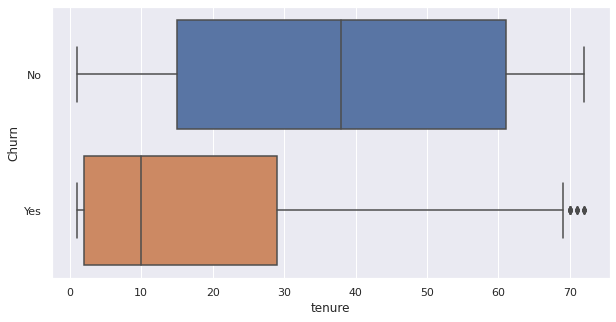

In [26]:
plt.figure(figsize = (10,5))

sns.boxplot(x=df["tenure"], y =df['Churn'])

# (fig. 35)

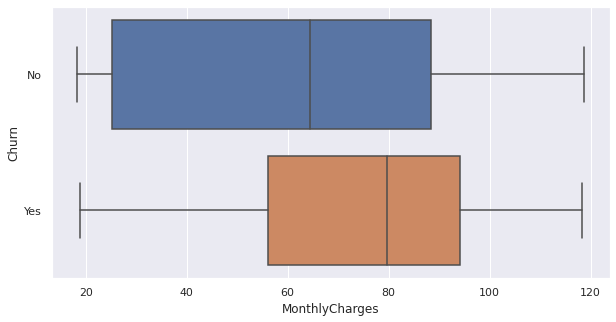

In [27]:
plt.figure(figsize = (10,5))

sns.boxplot(x=df["MonthlyCharges"], y =df['Churn'])

# (fig. 36)

**Conclusion:**
<br>

1.   Based on figure 21-25, customers who doesn't have `Partner` and `Dependent` tends to **Churn**. Although, customer who have long-term subscription, **2 years**, stayed more than customer who only subscribe month-to-month. 
2.   The services with least **Churn** customers are `OnlineSecurity`, `TechSupport`, ans `OnlineBackup`. Churned customers mostly used `PhoneService`, and `DeviceProtection`. (fig. 26-33)
3.   Even though **electronic checks** is tho most used `PaymentMethod`, but, it shared the highest numbers of **churned** customer. (fig. 34)
4.   Most of the **churned** customers has higher rate of `MonthlyCharges`, and the longest the customer has been using the service, the lest probability to `Churn`.



# MODEL BUILDING

## Data Prepocessing

In [31]:
df_numericals.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [33]:
df_categoricals.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,5365,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,3953,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,2558,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,5524,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,6500,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [34]:
# Encoding the df_categoricals, for modeling

from sklearn.preprocessing import LabelEncoder
col = list(df_categoricals)
df_categoricals[col] = df_categoricals[col].apply(LabelEncoder().fit_transform)
df_categoricals.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,5365,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,3953,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,2558,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,5524,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,6500,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [35]:
# combining between df_numericals with df_categoricals

df_update = pd.concat([df_categoricals, df_numericals], axis=1, join='inner')

In [36]:
df_update.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges
0,5365,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0,1,29.85
1,3953,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0,34,56.95
2,2558,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0,2,53.85
3,5524,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0,45,42.30
4,6500,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0,2,70.70


In [37]:
# drop the customerID column, because we won't use it

df_update = df_update.drop('customerID', axis = 1)

In [38]:
df_update.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0,1,29.85
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0,34,56.95
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0,2,53.85
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0,45,42.30
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0,2,70.70


In [39]:
target = df_update['Churn'].value_counts().reset_index()
target.rename(columns={'index':'Churn','Churn':'value'}, inplace=True)
target['percentage'] = round((target['value']/target['value'].sum())*100,2)
target

,Churn,value,percentage
0,0,5163,73.42
1,1,1869,26.58


The value counts for **yes/no** `Churn` is really imbalanced with **73.42% : 26.58%**, it is clearly **unbalanced**. To achieve high accuracy, we can try to balance the data.

## Balancing The Data

In [41]:
from imblearn import under_sampling, over_sampling

X = df_update.drop(['Churn'],axis=1)
y = df_update['Churn']

# Undersampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X, y)

# Overampling
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X, y)

# Overampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)

In [42]:
df_undersampling = pd.concat([X_under, y_under], axis=1)
df_undersampling.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,Churn
0,1,0,0,1,2,1,0,0,0,0,2,2,0,1,0,1,45,93.90,0
1,1,1,0,0,1,0,2,0,0,2,2,0,1,1,0,0,50,44.45,0
2,0,0,0,1,0,2,1,1,1,1,1,1,0,1,3,0,1,20.35,0


In [44]:
df_undersampling['Churn'].value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [45]:
df_oversampling = pd.concat([X_over, y_over], axis=1)
df_oversampling.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0,2,53.85,1


In [46]:
df_oversampling['Churn'].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [47]:
df_oversampling_smote = pd.concat([X_over_smote, y_over_smote], axis=1)
df_oversampling_smote.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0,2,53.85,1


In [49]:
df_oversampling_smote['Churn'].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [50]:
# balancing the yes/no values, from Churn

sm = over_sampling.SMOTE(random_state=42)

X = df_update.drop(['Churn'],axis = 1)
Y = df_update['Churn']
X_sm, y_sm = sm.fit_resample(X, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (7032, 18)
Shape of X after SMOTE: (10326, 18)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Churn, dtype: float64

In [51]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

Now, the [yes/no] values for `Churn` already balanced with [5163/5163]

## **Random Forest**

First we will use **Random Forest** to modeling the data

### Split Dataset

In [52]:
# split the dataset with balanced data

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_sm, 
                                                                y_sm, 
                                                                test_size=0.25, 
                                                                random_state=42)

### Modeling with Random Forest

In [53]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_rf, y_train_rf)
preds = model.predict(X_test_rf)

### Metric Evaluation

Due to `Churn` data now balanced [yes/no values] we can use accuracy.

In [54]:
print('Accuracy',accuracy_score(y_test_rf, preds))

Accuracy 0.8392718822618126


Count the **Precision** [Positive Predictive Value], and **Recall** [sensitivity]

In [55]:
classification_decision1 = (classification_report(y_test_rf, model.predict(X_test_rf)))

In [56]:
print(classification_decision1)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1304
           1       0.83      0.85      0.84      1278

    accuracy                           0.84      2582
   macro avg       0.84      0.84      0.84      2582
weighted avg       0.84      0.84      0.84      2582



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


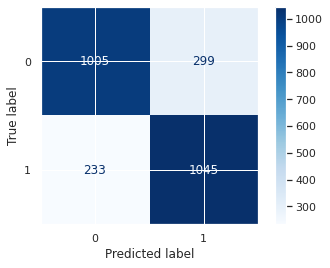

In [101]:
# plot confusion matrix

from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(model, X_test_rf, y_test_rf, cmap=plt.cm.Blues)
plt.show()

## **Decision Tree**

For the second model, we will use **Decision Tree**

### Split Dataset

In [102]:
# split the dataset with balanced data

from sklearn.model_selection import train_test_split 
X_train_dt, X_test_dt,y_train_dt,y_test_dt = train_test_split(X_sm,
                                                y_sm,
                                                test_size = 0.3,
                                                random_state = 42)

### Modeling with Decision Tree

In [103]:
dt = DecisionTreeClassifier(random_state=1234)
model = dt.fit(X_train_dt, y_train_dt)

In [104]:
y_pred_dt = dt.predict(X_test_dt)
y_pred_dt

array([1, 0, 0, ..., 1, 1, 0])

### Metric Evaluation

Due to `Churn` data now balanced [yes/no values] we can use accuracy.

In [105]:
print('Accuracy',accuracy_score(y_test_dt, dt.predict(X_test_dt)))

Accuracy 0.7969657843770175


Count the **Precision** [Positive Predictive Value], and **Recall** [sensitivity]

In [106]:
classification_decision2 = (classification_report(y_test_dt, dt.predict(X_test_dt)))

In [107]:
print(classification_decision2)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1563
           1       0.78      0.82      0.80      1535

    accuracy                           0.80      3098
   macro avg       0.80      0.80      0.80      3098
weighted avg       0.80      0.80      0.80      3098



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


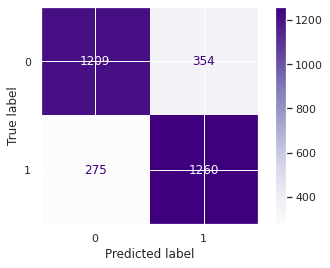

In [114]:
# plot confusion matrix

from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(dt, X_test_dt, y_test_dt, cmap=plt.cm.Purples)
plt.show()

## **K Nearest Neighbors [KNN]**

### Split dataset

In [115]:
from sklearn.model_selection import train_test_split 
X_train_knn, X_test_knn,y_train_knn,y_test_knn = train_test_split(X_sm,
                                                y_sm,
                                                test_size = 0.3,
                                                random_state = 42)

### Modeling with KNN

In [116]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier()

### Metric Evaluation

Because `Churn` data now balanced [yes/no values] we can use accuracy.

In [117]:
print('Accuracy',accuracy_score(y_test_knn, knn.predict(X_test_knn)))

Accuracy 0.8014848289218851


In [119]:
classification_decision3 = (classification_report(y_test_knn, dt.predict(X_test_knn)))

In [120]:
print(classification_decision3)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1563
           1       0.78      0.82      0.80      1535

    accuracy                           0.80      3098
   macro avg       0.80      0.80      0.80      3098
weighted avg       0.80      0.80      0.80      3098



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


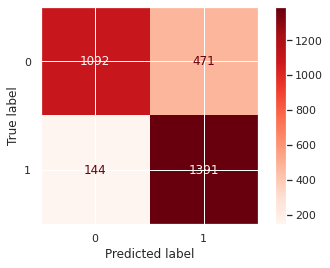

In [123]:
# plot confusion matrix

from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(knn, X_test_knn, y_test_knn, cmap=plt.cm.Reds)
plt.show()

## **Logistic Regression**

### Split Dataset

In [124]:
from sklearn.model_selection import train_test_split 
X_train_lr, X_test_lr,y_train_lr,y_test_lr = train_test_split(X_sm,
                                                y_sm,
                                                test_size = 0.3,
                                                random_state = 42)

### Modeling with Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_lr, y_train_lr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

### Metric Evaluation

Due to `Churn` data now balanced [yes/no values] we can use accuracy.

In [126]:
print('Accuracy',accuracy_score(y_test_lr, logreg.predict(X_test_lr)))

Accuracy 0.7921239509360878


In [127]:
classification_decision4 = (classification_report(y_test_lr, logreg.predict(X_test_lr)))

In [128]:
print(classification_decision4)

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1563
           1       0.77      0.83      0.80      1535

    accuracy                           0.79      3098
   macro avg       0.79      0.79      0.79      3098
weighted avg       0.79      0.79      0.79      3098



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


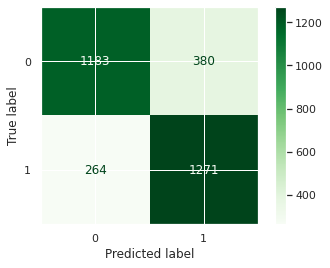

In [129]:
# plot confusion matrix

from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(logreg, X_test_lr, y_test_lr, cmap=plt.cm.Greens)
plt.show()

## Evaluation

For the model building, we use four different kind of models which give different results. Here are the results :

<br>

|     Model    |    Accuracy    |
|--------------|----------------|
| Random Forest | 83.9% |
| Decision Tree | 79.6% |
| KNN | 80.1% |
| Logistic Regression | 79.2% |

<br>

Based on above table, out of four models, Random Tree give the best result with **83,9%**. Which is mean, that if we use Random Forest, it will predict **83,9%** correctly from the dataset. 